# INTRODUCTION

Project ini membahas mengenai penerapan Supervised Machine Learning, yaitu metode Classification. Algoritma model klasifikasi yang digunakan dalam project ini adalah Logistic Regression, Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbor, Random Forest, dan Naive Bayes. Project ini dilakukan dengan tujuan agar mampu mengevaluasi dan menerapkan metode klasifikasi pada Machine Learning. Project ini menggunakan dataset yang berisi kampanye pemasaran suatu institusi bank yang terbagi menjadi empat, yaitu sebagai berikut.

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014].
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the exmaples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

Project ini menggunakan dataset bank-additional-full.csv, kecuali untuk algoritma SVM yang menggunakan dataset bank-addtional.csv karena jumlah observasinya yang lebih kecil. Objektif dari klasifikasi menggunakan data ini adalah untuk memprediksi apakah suatu klien bank akan berlangganan deposito berjangka (variabel y) berdasarkan atribut-atribut kampanye pemasaran yang dilakukan oleh institusi bank.

Sumber: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import pydotplus
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn import tree
from IPython.display import Image

# LOAD DATA

In [4]:
bank_add_full = pd.read_csv('dataset\\bank-additional-full.csv', sep=';')
bank_add = pd.read_csv('dataset\\bank-additional.csv', sep=';')

In [5]:
# Menyalin data
df_baf = bank_add_full.copy()
df_ba = bank_add.copy()

In [6]:
df_baf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df_baf.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
df_baf.shape

(41188, 21)

In [9]:
df_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df_baf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Dari data sebelumnya diketahui bahwa terdapat 41188 baris/observasi dan 21 kolom/atribut, dengan 10 kolom bertipe numerik dan 11 kolom bertipe kategorik.

# DATA CLEANING

Dalam bagian ini berisi proses menyiapkan data berupa data cleaning sebelum dilakukan eksplorasi data yang lebih lanjut. Proses ini memiliki tujuan untuk melihat apakah dalam data tersebut terdapat nilai yang hilang atau missing values, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data di dalamnya.

In [10]:
# Memeriksa duplikasi dalam data
df_baf.duplicated().sum()

12

In [11]:
# Memeriksa missing values
df_baf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Berdasarkan output diketahui bahwa terdapat 12 duplikasi dan tidak terdapat missing values dalam data sehingga duplikasi dalam data akan dihapus.

In [12]:
# Menghapus duplikasi
df_baf.drop_duplicates(keep='last', inplace=True)

In [13]:
df_baf.duplicated().sum()

0

In [14]:
# Mengembalikan nomor indeks data
df_baf.reset_index(inplace=True)
df_baf.drop('index', axis=1, inplace=True)

# EKSPLORASI DATA

Setelah melakukan data cleaning, langkah selanjutnya adalah eksplorasi data yang dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga memiliki pengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

## Frekuensi nilai pada variabel y

In [15]:
df_baf['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [16]:
# iterated through df and stored data with datatype as 'object' to new variable cat_col
cat_col = [n for n in df_baf.columns if df_baf[n].dtypes == 'object']

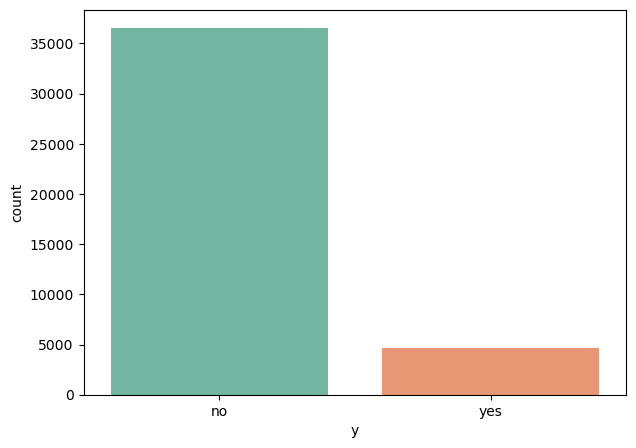

In [17]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="y", data=df_baf, palette='Set2')
plt.show()

Berdasarkan output di atas, diketahui bahwa terdapat 36537 "no" dan 4639 "yes". Hal ini dapat diartikan bahwa sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.

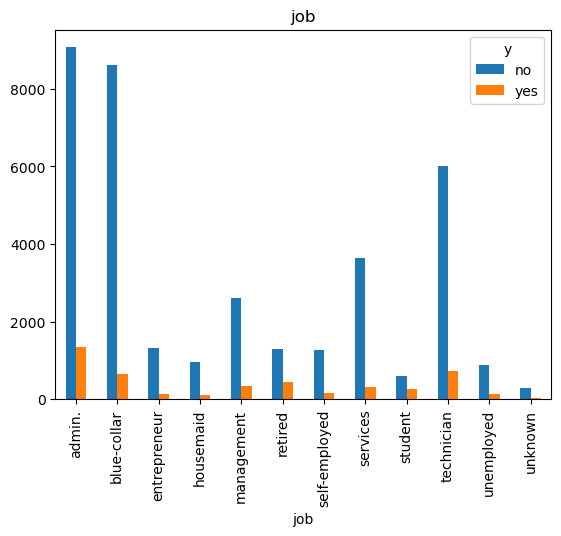

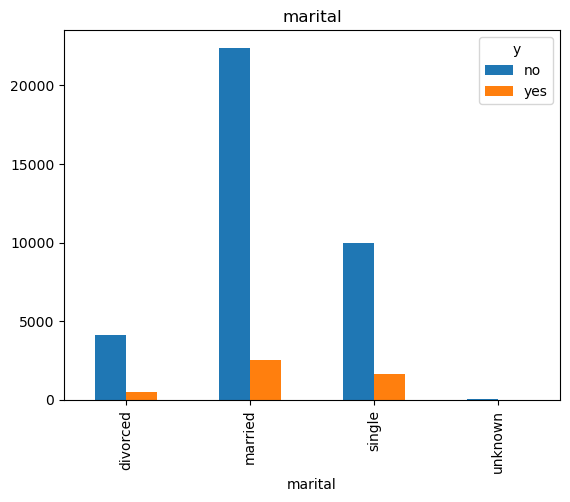

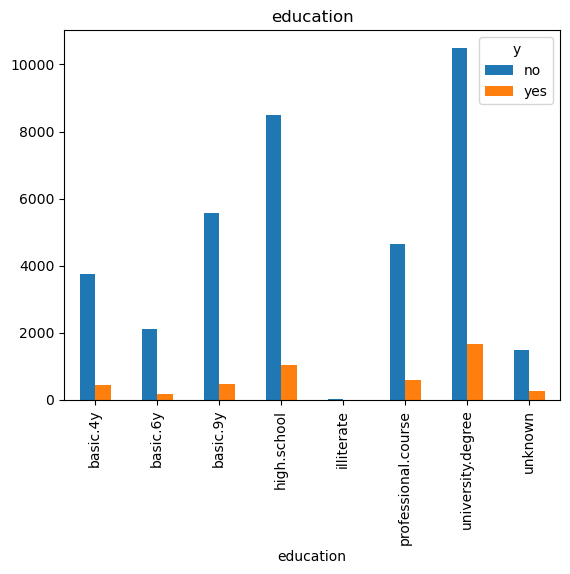

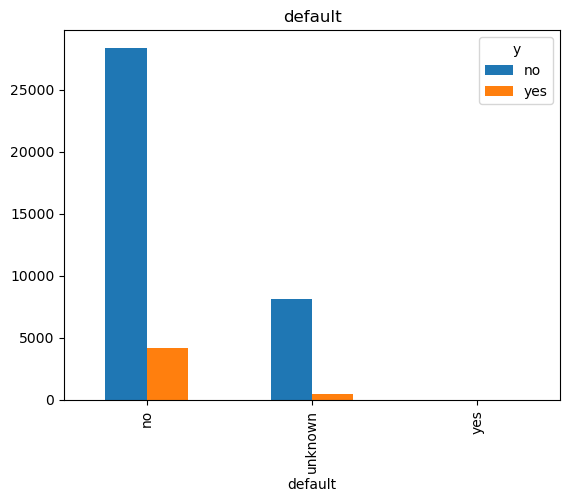

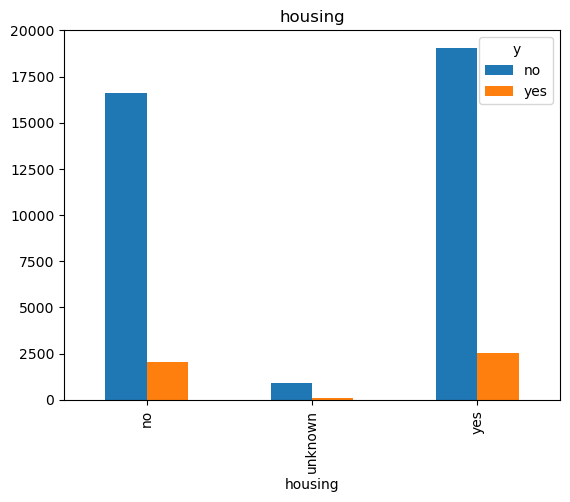

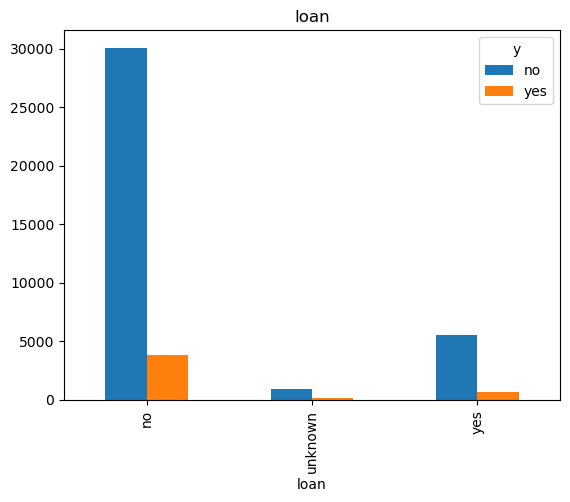

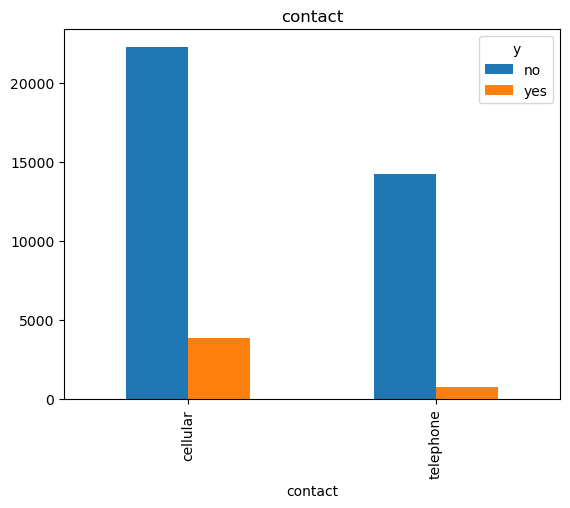

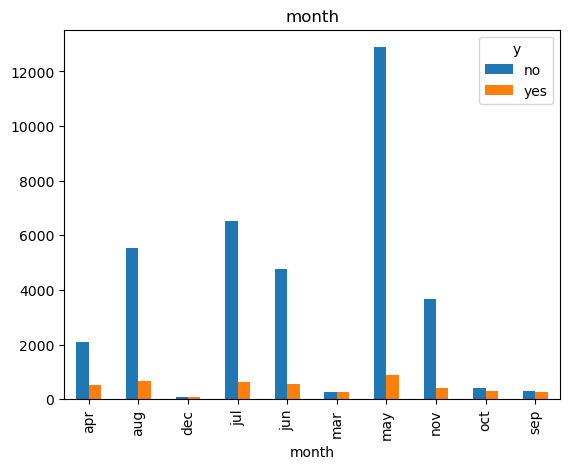

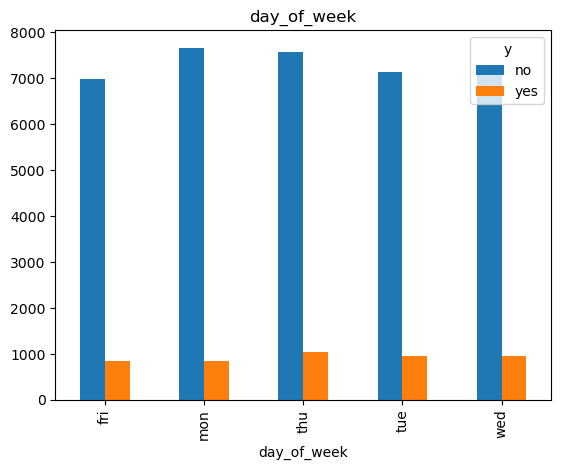

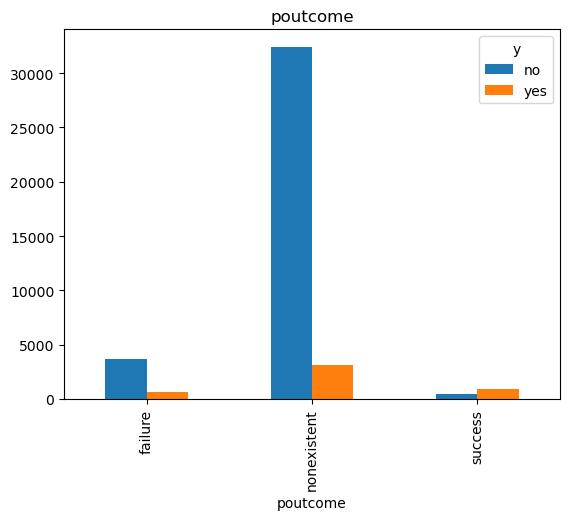

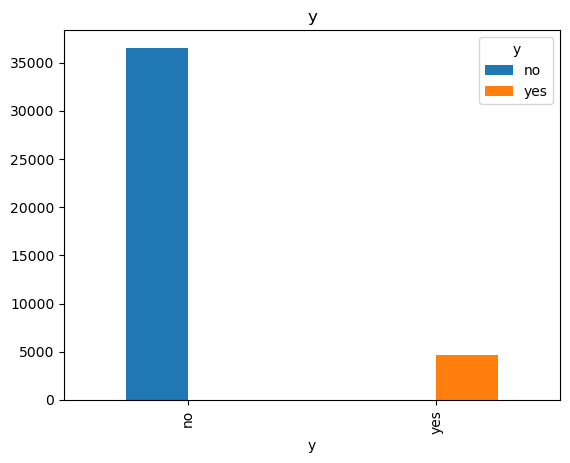

In [18]:
for col in cat_col:
    pd.crosstab(df_baf[col], df_baf.y).plot(kind = 'bar')
    plt.title(col)

## Nilai dan distribusi statistik kolom numerik

In [19]:
# Nilai statistik kolom numerik
df_baf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


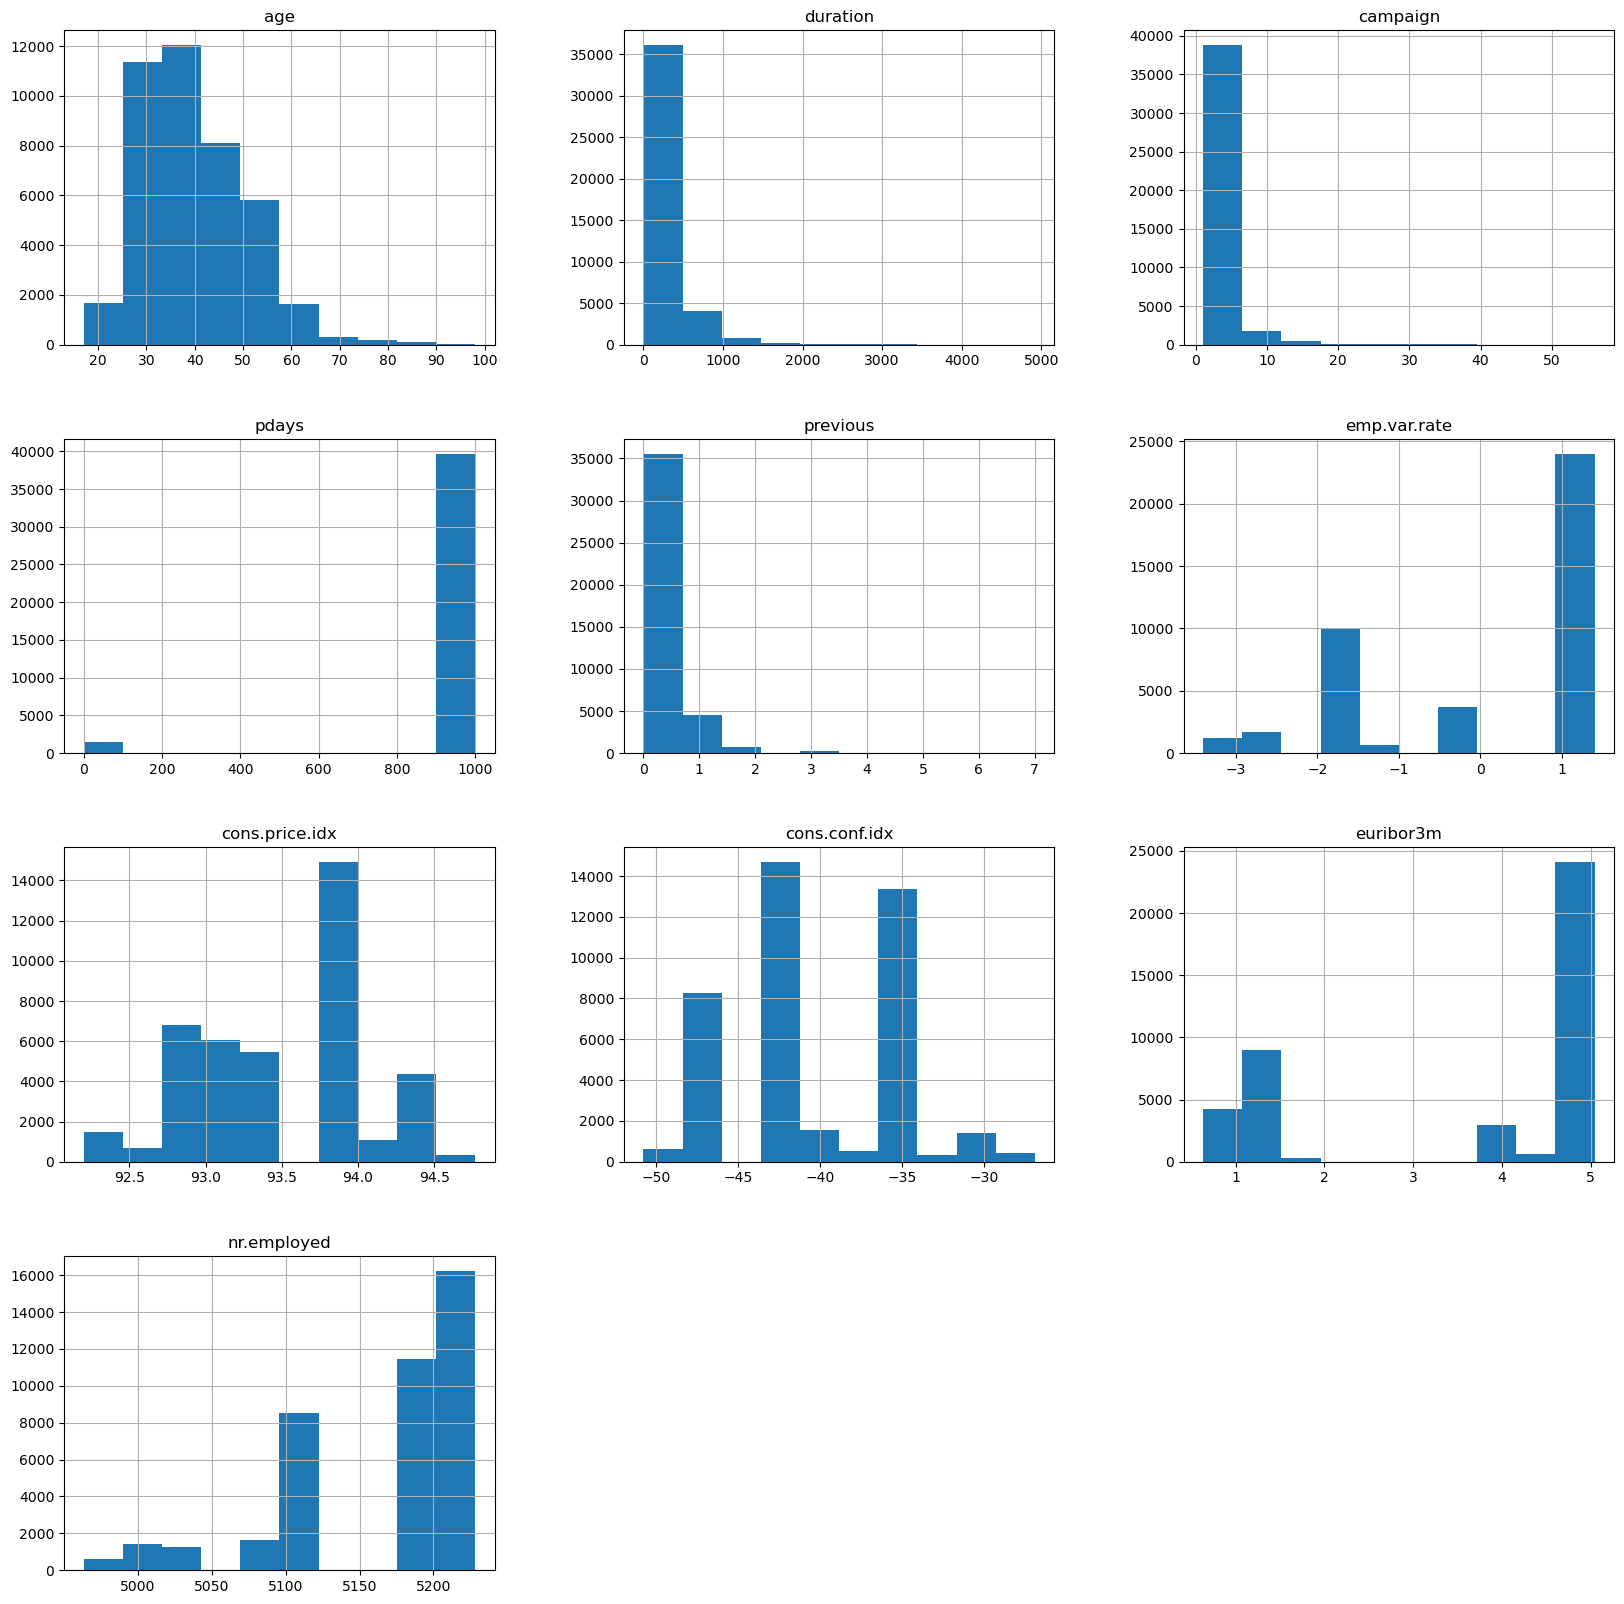

In [20]:
# Visualisasi menggunakan histogram
df_baf.hist(figsize=(20, 20))
plt.show()

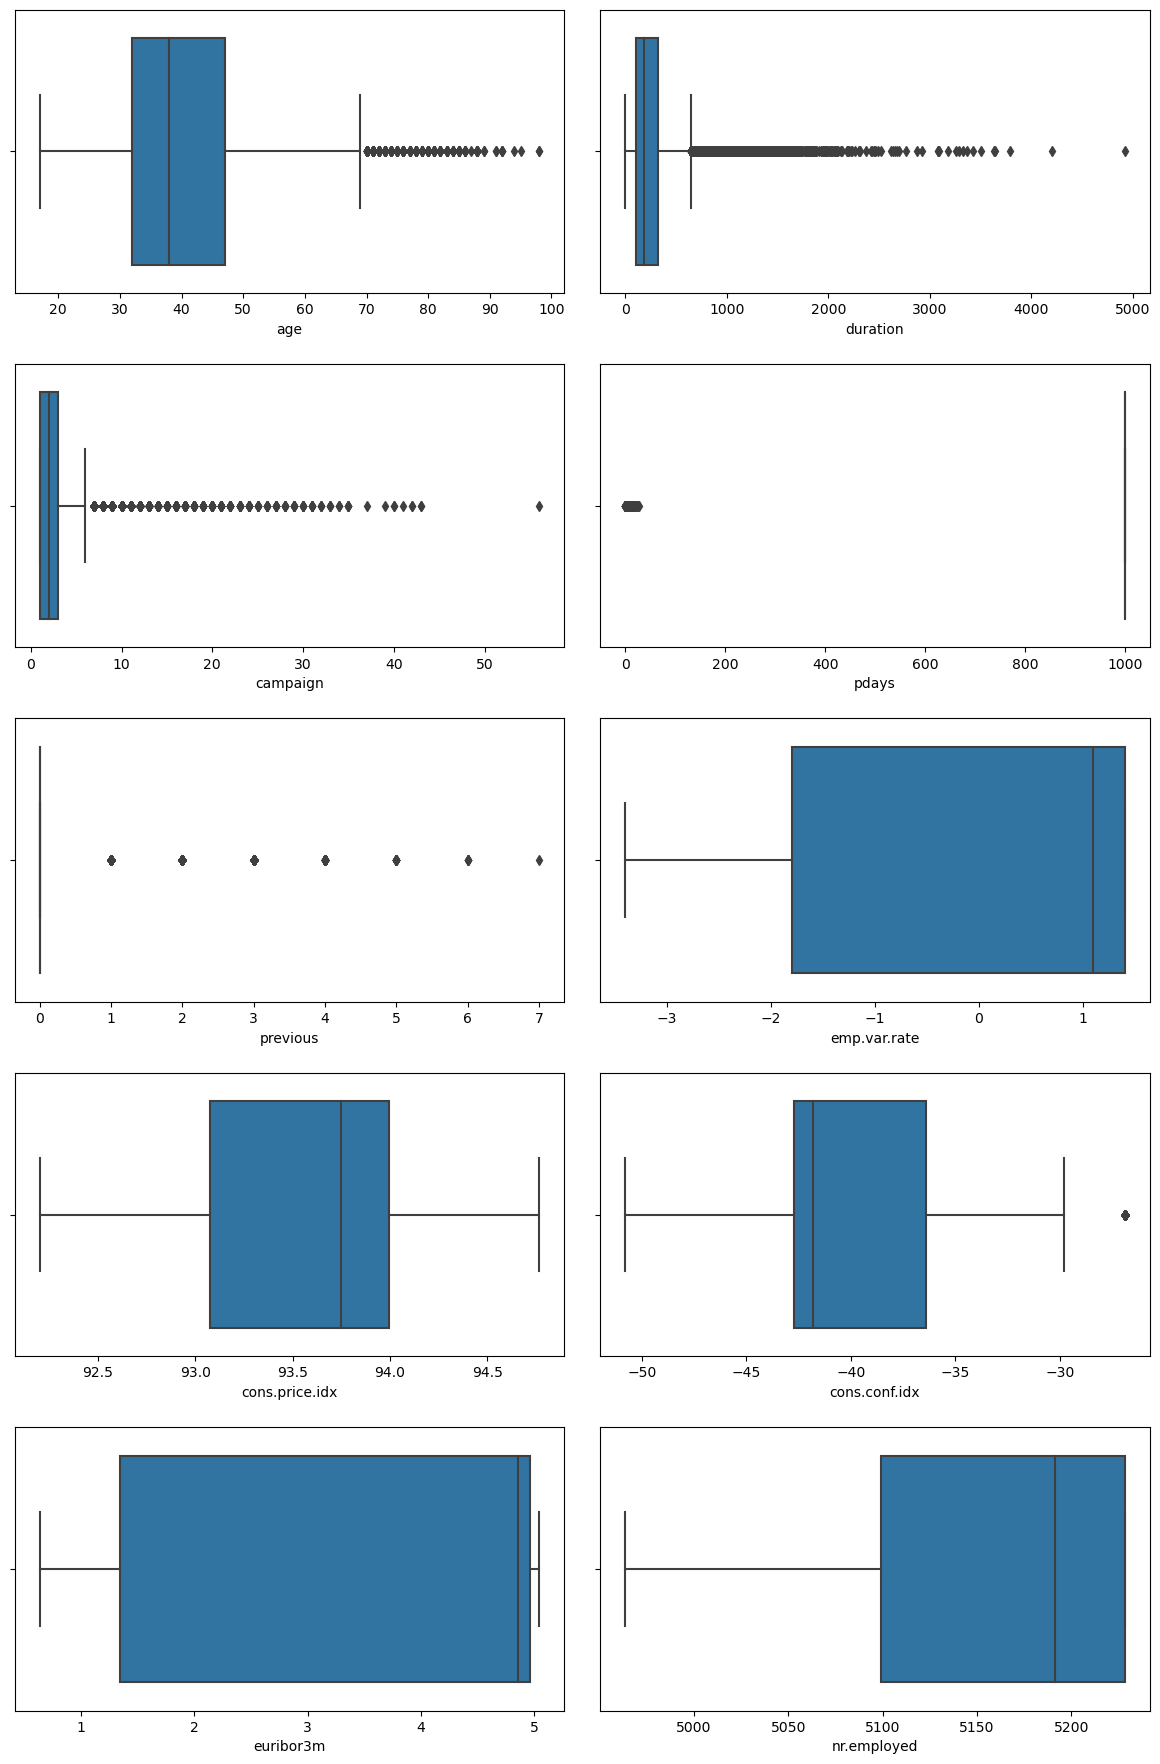

In [21]:
# Visualisasi dengan box plot
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, ax = plt.subplots(5,2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.boxplot(data=df_baf, x=col, ax=ax[i])

fig.tight_layout(pad=2.0)

Berdasarkan output plot nilai dan distribusi statistik masing-masing kolom numerik di atas dapat diketahui bahwa:

1. Rata-rata umur klien yang ditunjuk sebagai target kampenye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai terget adalah klien yang berumur sekitar 30-40 tahun.
2. Rata-rata durasi telepon terakhir bersama klien adalah sekitar 250 detik.
3. Kontak klien yang dihubungi dalam pelaksanaan kampanye ini adalah 2-3 kontak.
4. Sebagian besar klien tidak dihubungi atau tidak melakukan kontak pada saat kampanye sebelumnya ditandai dengan nilai 999 pada kolom campaign dan juga nilai 0 pada kolom previous yang memiliki frekuensi tinggi.
5. Karakteristik sosial dan ekonomi saat kampanye juga disertakan dalam analisis untuk melihat pengaruhnya pada keputusan klien dalam mengambil keputusan untuk berlangganan deposito berjangka yang dilihat dari distribusi frekuensi nilai karakteristik sosial dan ekonomi pada saat itu cukup bervariasi.

## Distribusi Statistik Masing-masing Kolom Numerik Berdasarkan Variabel y

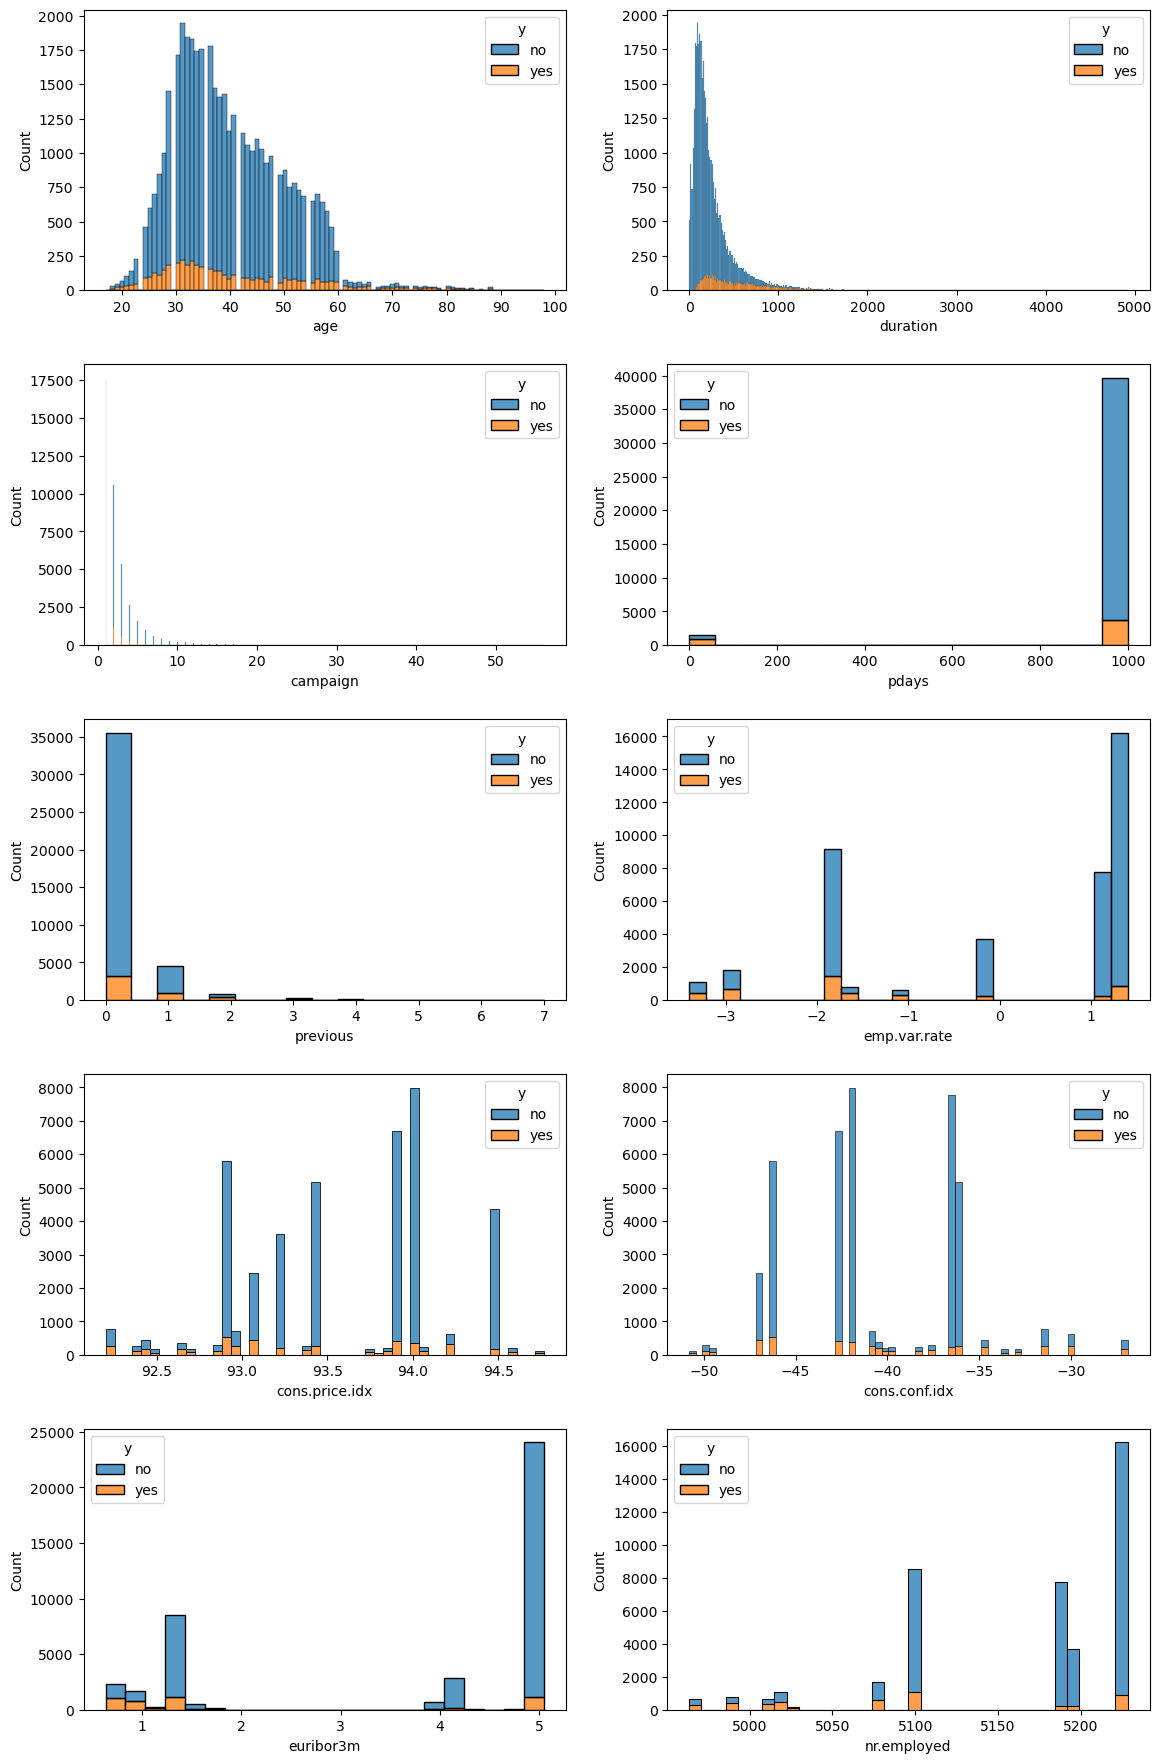

In [22]:
# Visualisasi menggunakan histogram
cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5, 2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df_baf, x=col, hue='y', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)

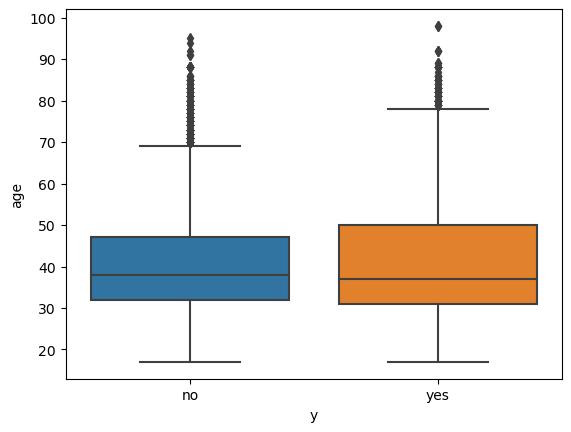

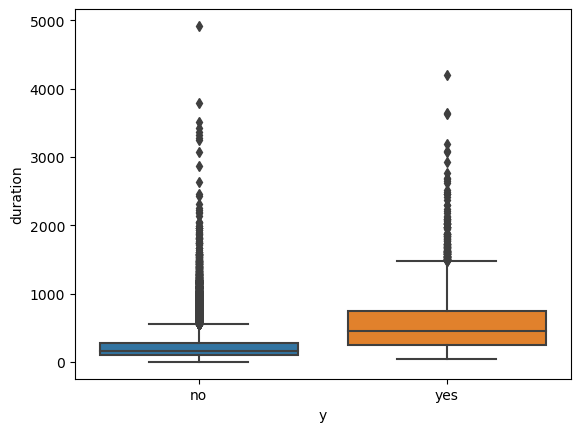

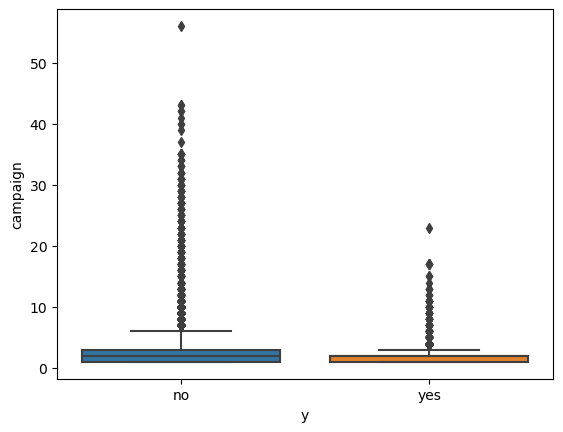

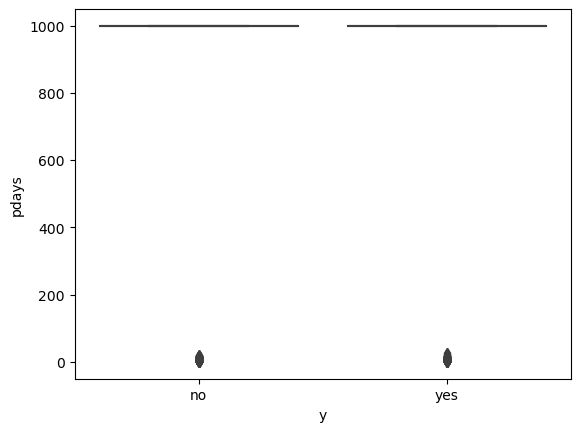

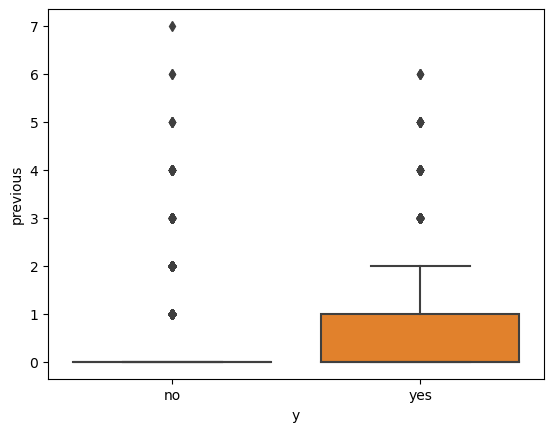

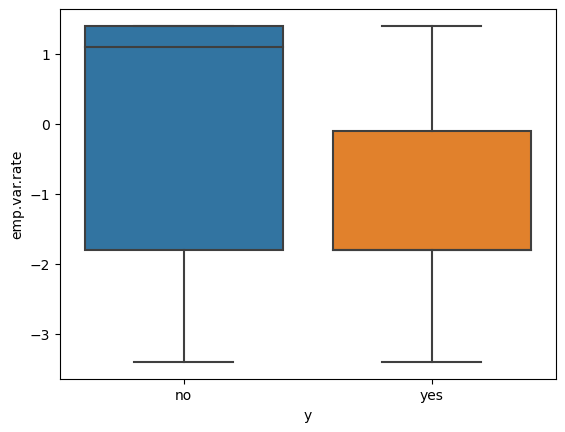

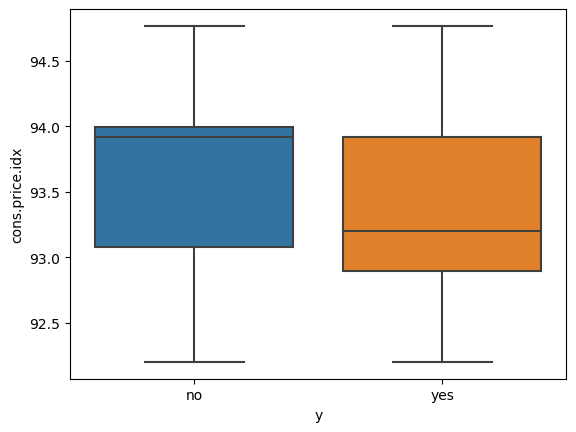

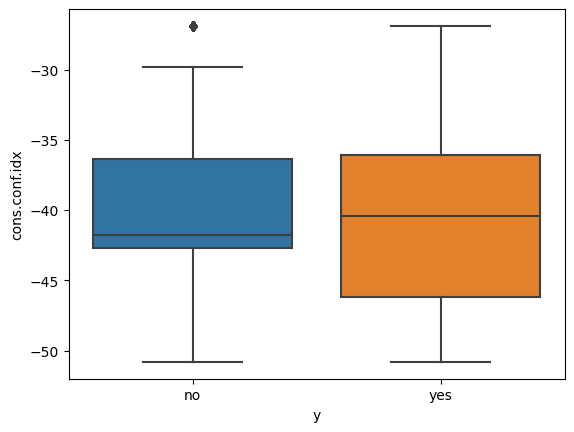

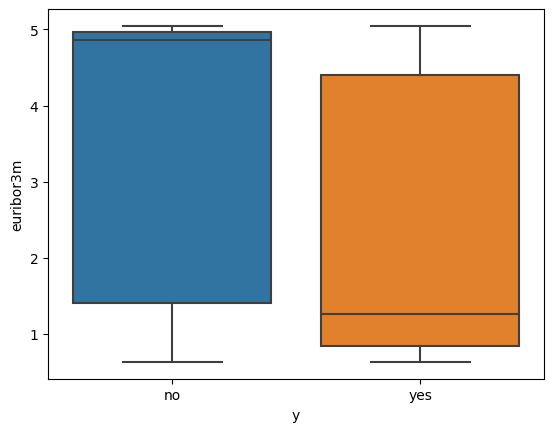

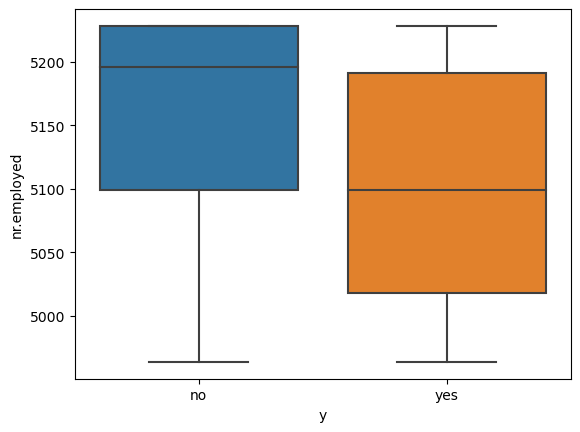

In [23]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
    sns.boxplot(x = 'y', y = i, data = df_baf)
    plt.show()

Berdasarkan plot distribusi statistik yang dikelompokkan berdasarkan nilai pada variabel y yang dapat diketahui bahwa sebagai berikut.

1. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien dengan umur 30-40 tahun.
2. Durasi dalam telepon yang dilakukan dengan klien semakin lama memungkinkan klien untuk memilih berlangganan deposito berjangka semakin besar.

Selanjutnya menggunakan matriks korelasi untuk melihat pengaruh variabel numerik lain terhadap variabel y.

## Korelasi pada Kolom Numerik terhadap Variabel y

In [24]:
# Mengubah nilai pada kolom y
df_baf['y'] = df_baf.y.replace({"yes": 1, "no": 0 })

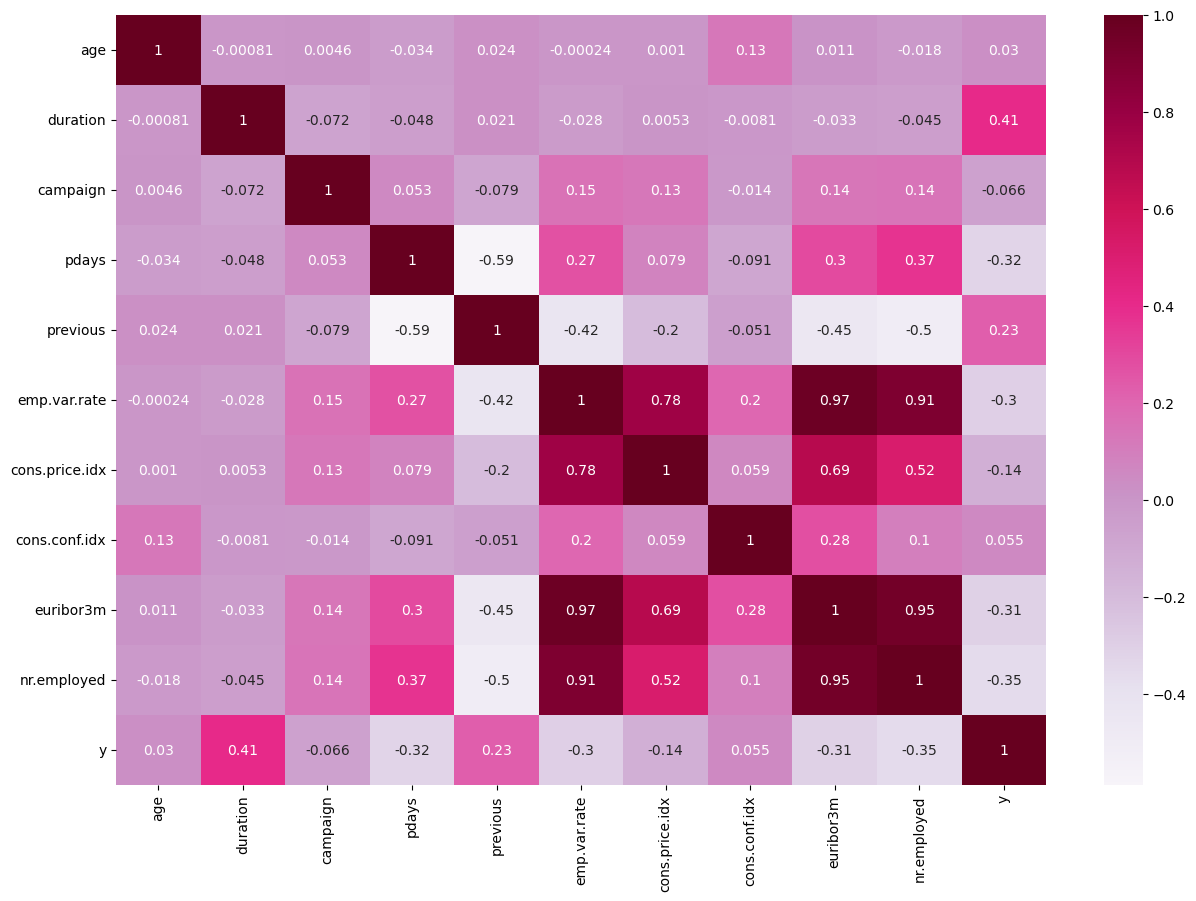

In [25]:
# Visualisasi Korelasi menggunakan Heatmap plot
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_baf.corr(numeric_only = True), annot=True, cmap="PuRd")

Dari plot di atas, terlihat bahwa kolom age, campaign, dan cons.conf.idx memiliki korelasi yang sangat rendah terhadap variabel y yang berarti umur klien, jumlah kontak selama kampanye, dan consumer confidence index cenderung tidak memengaruhi keputusan klien dalam memilih akan berlangganan deposito berjangka atau tidak. Kolom lainnya, yaitu duration memiliki korelasi yang paling tinggi terhadap variabel y sebesar 0.41 yang menunjukkan bahwa durasi kontak terakhir yang dilakukan semakin panjang, maka kemungkinan klien memilih berlangganan deposito berjangka akan semakin besar. Pada karakteristik sosial dan ekonomi yang memiliki korelasi negatif dengan variabel y.

## Nilai dan Distribusi Statistik Masing-masing Kolom Kategorik berdasarkan Variabel y

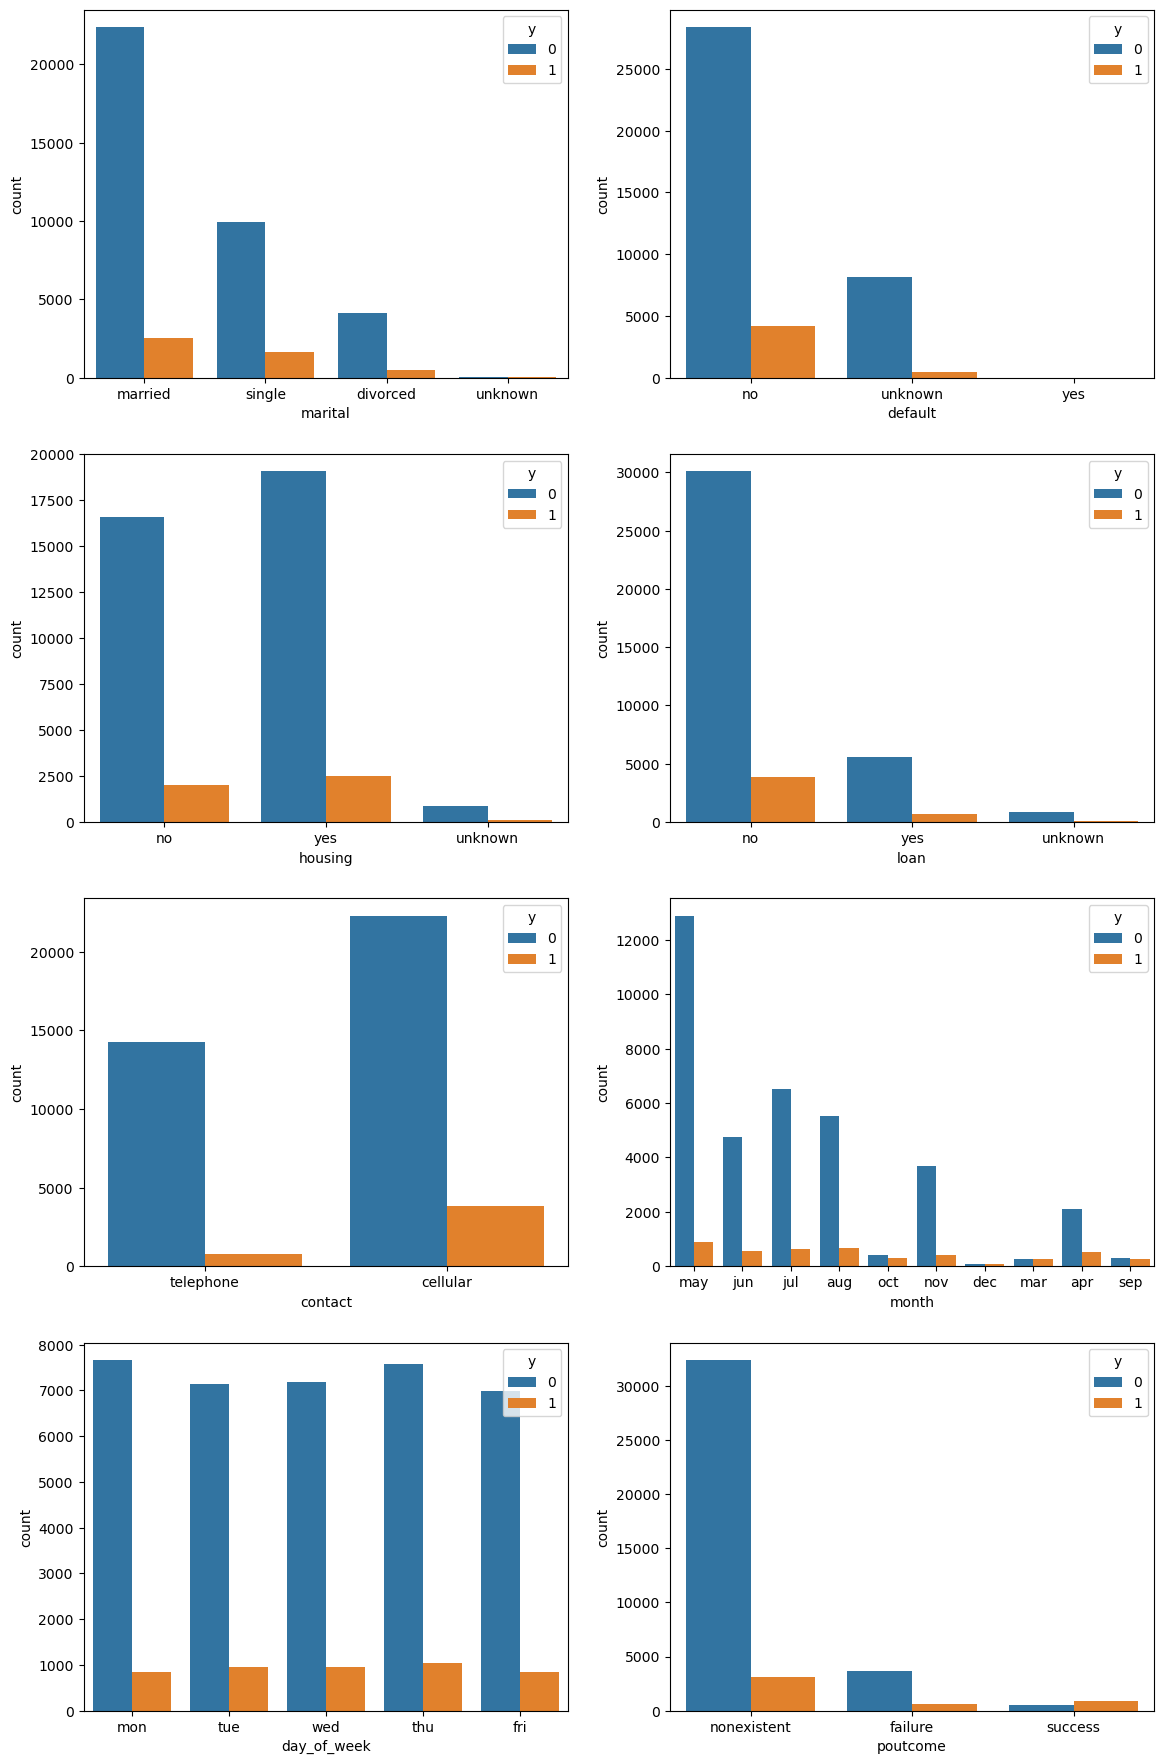

In [26]:
# Visualisasi menggunakan count plot
cols = ['marital','default','housing','loan','contact','month','day_of_week','poutcome']

fig, ax = plt.subplots(4, 2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.countplot(data=df_baf, x=col, hue='y', ax=ax[i])

fig.tight_layout(pad=2.0)

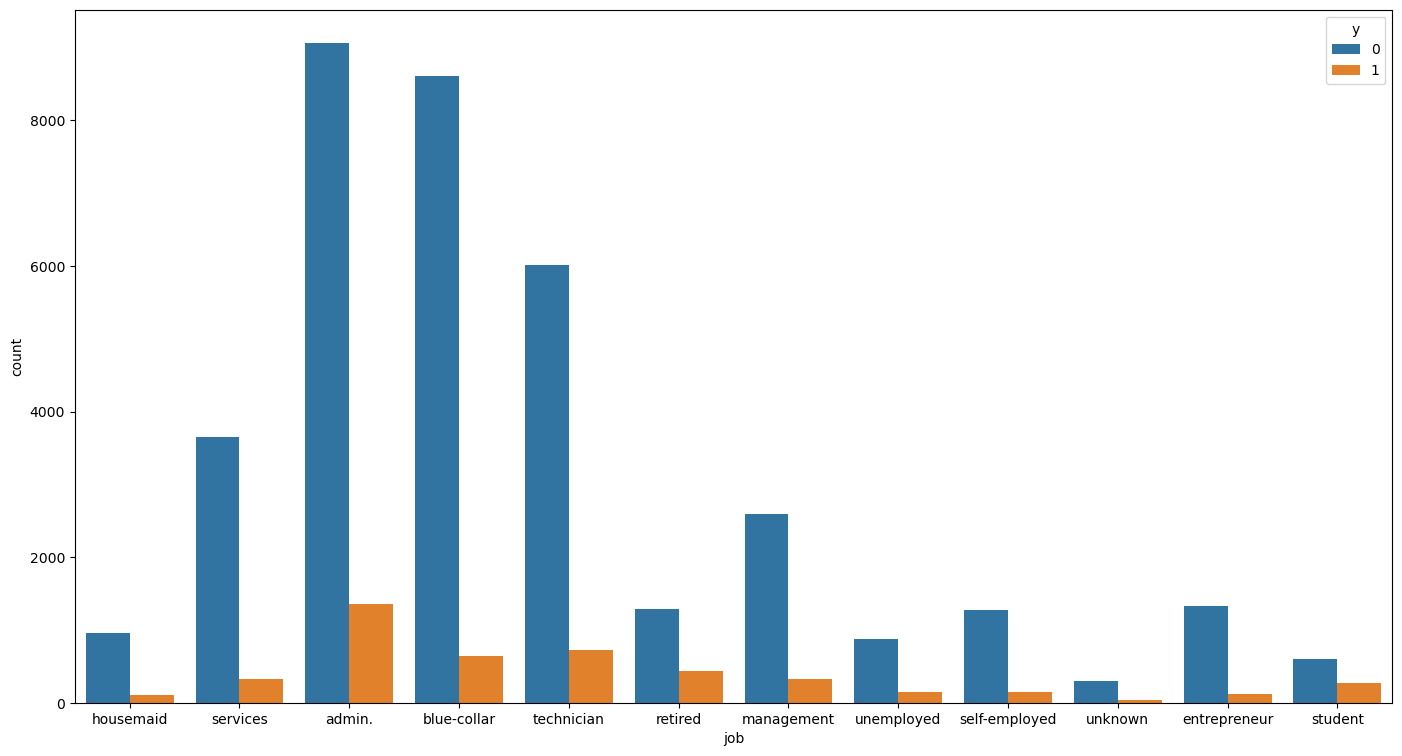

In [27]:
plt.subplots(figsize=(17,9))
sns.countplot(data=df_baf, x='job', hue='y')
plt.show()

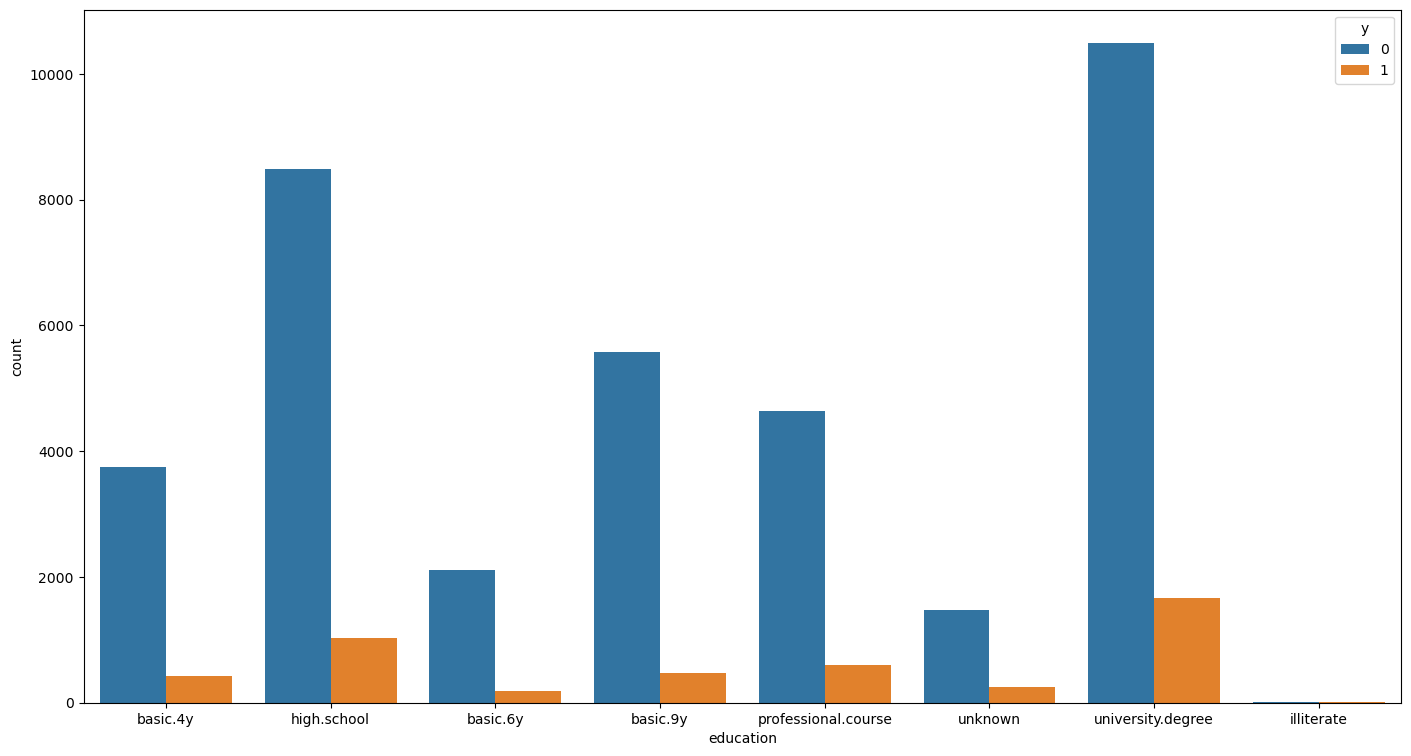

In [28]:
plt.subplots(figsize=(17,9))
sns.countplot(data=df_baf, x='education', hue='y')
plt.show()

Dilihat dari plot di atas, dapat diketahui bahwa:

1. Mayoritas kliennya berstatus sudah menikah yang memilih untuk berlangganan deposito berjangka.
2. Mayoritas klien memiliki tingkat pendidikan university degree.
3. Mayoritas klien memiliki rumah, tetapi kepemilikan rumahnya cenderung tidak berpengaruh saat klien memilih berlangganan deposito atau tidak.
4. Sebagian besar klien yang memilih berlangganan deposito berjangka adalah klien yang tidak memiliki loan/hutang.
5. Profesi yang dimiliki klien untuk berlangganan deposito adalah sebagian besar sebagai admin.
6. Waktu kontak yang dilakukan klien tidak berpengaruh dengan keputusan klien untuk memilih berlangganan deposito atau tidak.

# DATA PREPROCESSING

Pada proses ini dilakukan untuk menyiapkan data sebagai proses pelatihan model prediksi klasifikasi.

## Menghapus Kolom yang Tidak Memiliki Pengaruh pada Variabel y

Dari data analisis yang dilakukan sebelumnya sudah dilihat bahwa kolom month dan day_of_week tidak berpengaruh pada variabel y sehingga lebih baik dihapus. Namun, kolom age, campaign, dan cons.conf.idx tidak dihapus karena masih akan disertakan dalam analisis untuk melihat pengaruhnya berdasarkan nilai feature importance.

In [29]:
df_baf.drop(['month','day_of_week'], axis=1, inplace=True)

In [30]:
df_baf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Pda kolom age dan campaign diketahui nilai maksimumnya memiliki perbedaan yang sangat signifikan terhadap nilai kuartil 3. Klien yang berumur 98 tahun memiliki kemungkinan yang sangat kecil, maka umur di atas 70 tahun tidak disertakan dalam analisis. Juga jumlah kontak yang dihubungi lebih dari 10 juga tidak disertakan dalam analisis karena dianggap sebagai outlier.

In [31]:
df_baf = df_baf[df_baf['age']<70].copy()

In [32]:
df_baf = df_baf[df_baf['campaign']<10].copy()

In [33]:
df_baf.reset_index(inplace=True)

## Standarisasi Data

Standarisasi data dilakukan untuk masing-masing kolom numerik yang tidak memiliki distribusi tertentu dan memiliki satuan yang berbeda.

In [34]:
# Standarisasi dengan StandardScaler
df_scalling = df_baf[['age','duration','pdays','previous','emp.var.rate','campaign',
                  'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

scaler = StandardScaler()
scaler.fit(df_scalling)
scaled_features = scaler.transform(df_scalling)
df_scalling = pd.DataFrame(scaled_features,columns = df_scalling.columns)
df_scalling.head()

,age,duration,pdays,previous,emp.var.rate,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.696628,0.001326,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
1,1.799962,-0.430076,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
2,-0.266721,-0.133487,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
3,0.043281,-0.422373,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
4,1.696628,0.178509,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776


## Encoder pada kolom kategorik

In [35]:
df_scalling['job'] = df_baf['job']
df_scalling['marital'] = df_baf['marital']
df_scalling['education'] = df_baf['education']
df_scalling['default'] = df_baf['default']
df_scalling['housing'] = df_baf['housing']
df_scalling['loan'] = df_baf['loan']
df_scalling['contact'] = df_baf['contact']
df_scalling['poutcome'] = df_baf['poutcome']

In [36]:
# Encoder
df_new = pd.get_dummies(df_scalling)

In [37]:
df_new['y'] = df_baf['y']

In [38]:
df_new.head()

,age,duration,pdays,previous,emp.var.rate,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.696628,0.001326,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,True,False,False,False,True,False,True,False,0
1,1.799962,-0.430076,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,True,False,False,False,True,False,True,False,0
2,-0.266721,-0.133487,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,True,True,False,False,False,True,False,True,False,0
3,0.043281,-0.422373,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,True,False,False,False,True,False,True,False,0
4,1.696628,0.178509,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,False,False,True,False,True,False,True,False,0


## Splitting Data

In [39]:
X = df_new.drop('y', axis=1)
y = df_new.y

In [40]:
X=df_new.loc[:,df_new.columns != 'y']
y=df_new.loc[:,df_new.columns == 'y']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('x train',len(X_train))
print('x test',len(X_test))
print('y train',len(y_train))
print('y test',len(y_test))

x train 31692
x test 7924
y train 31692
y test 7924


# Mendefinisikan Model

In [42]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(kernel='linear')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=200)
nb = GaussianNB()

# Melatih Model

In [43]:
# Logistic Regression
lr.fit(X_train,y_train)

c:\Users\HP\KMIH8\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\KMIH8\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
pred_test = lr.predict(X_test)

In [45]:
# K-NN
knn.fit(X_train, y_train)

c:\Users\HP\KMIH8\env\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [46]:
pred_knn = knn.predict(X_test)

In [47]:
# SVM

# Persiapan data
df_ba.drop_duplicates(keep='last', inplace=True)
df_ba.reset_index(inplace=True)
df_ba.drop('index', axis=1, inplace=True)
df_ba.drop(['month','day_of_week'], axis=1, inplace=True)
df_ba = df_ba[df_ba['age']<70].copy()
df_ba = df_ba[df_ba['campaign']<10].copy()
df_ba.reset_index(inplace=True)

df_scalling_ = df_ba[['age','duration','pdays','previous','emp.var.rate','campaign',
                  'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

scaler_ = StandardScaler()
scaler_.fit(df_scalling_)
scaled_features_ = scaler_.transform(df_scalling_)
df_scalling_ = pd.DataFrame(scaled_features_,columns = df_scalling_.columns)

df_scalling_['job'] = df_ba['job']
df_scalling_['marital'] = df_ba['marital']
df_scalling_['education'] = df_ba['education']
df_scalling_['default'] = df_ba['default']
df_scalling_['housing'] = df_ba['housing']
df_scalling_['loan'] = df_ba['loan']
df_scalling_['contact'] = df_ba['contact']
df_scalling_['poutcome'] = df_ba['poutcome']

df_new_ = pd.get_dummies(df_scalling_)
df_new_['y'] = df_ba['y']
mapping = {"yes":1,
          "no":0}

df_new_['y'] = df_ba['y'].map(mapping)

X_ = df_new_.drop('y', axis=1)
y_ = df_new_.y

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=0)

In [48]:
svm.fit(X_train_, y_train_)
pred_svm = svm.predict(X_test_)

In [49]:
# Decision Tree
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [50]:
# Random Forest
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_20112\2907527136.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [51]:
# Gaussian NB
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

c:\Users\HP\KMIH8\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Evaluasi Model

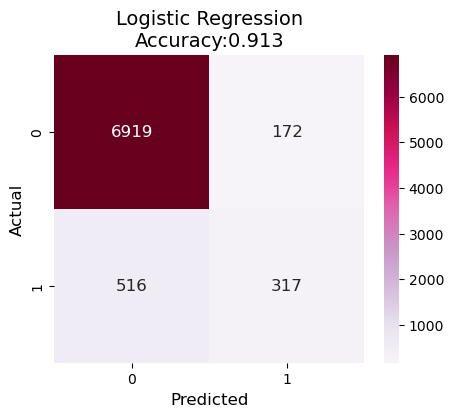

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7091
           1       0.65      0.38      0.48       833

    accuracy                           0.91      7924
   macro avg       0.79      0.68      0.72      7924
weighted avg       0.90      0.91      0.90      7924

Accuracy Score:- 0.9131751640585563
Precision Score:- 0.6482617586912065
Recall Score:- 0.38055222088835533


In [52]:
# Create a confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, pred_test)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, pred_test))

print(f'Accuracy Score:- {accuracy_score(y_test, pred_test)}')
print(f'Precision Score:- {precision_score(y_test,pred_test)}')
print(f'Recall Score:- {recall_score(y_test,pred_test)}')

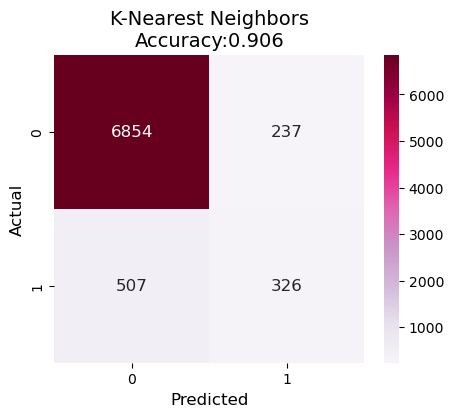

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7091
           1       0.58      0.39      0.47       833

    accuracy                           0.91      7924
   macro avg       0.76      0.68      0.71      7924
weighted avg       0.89      0.91      0.90      7924

Accuracy Score:- 0.906108026249369
Precision Score:- 0.5790408525754884
Recall Score:- 0.39135654261704683


In [53]:
# Create a confusion Matrix for K-NN
cm = confusion_matrix(y_test, pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, pred_knn)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, pred_knn))

print(f'Accuracy Score:- {accuracy_score(y_test, pred_knn)}')
print(f'Precision Score:- {precision_score(y_test,pred_knn)}')
print(f'Recall Score:- {recall_score(y_test,pred_knn)}')

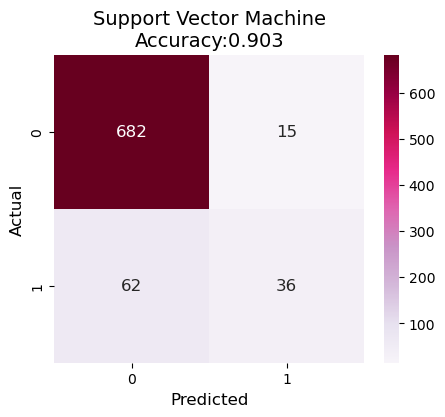

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       697
           1       0.71      0.37      0.48        98

    accuracy                           0.90       795
   macro avg       0.81      0.67      0.71       795
weighted avg       0.89      0.90      0.89       795

Accuracy Score:- 0.9031446540880503
Precision Score:- 0.7058823529411765
Recall Score:- 0.3673469387755102


In [54]:
# Create a confusion Matrix for SVM
cm = confusion_matrix(y_test_, pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test_, pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test_, pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test_, pred_svm)}')
print(f'Precision Score:- {precision_score(y_test_,pred_svm)}')
print(f'Recall Score:- {recall_score(y_test_,pred_svm)}')

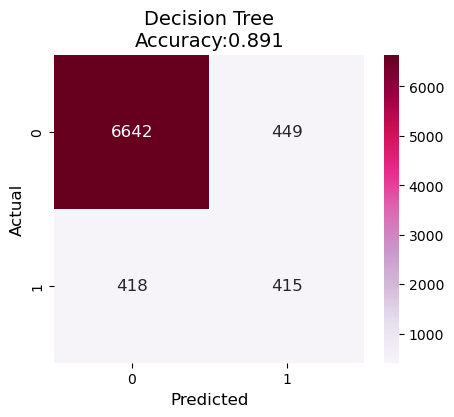

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7091
           1       0.48      0.50      0.49       833

    accuracy                           0.89      7924
   macro avg       0.71      0.72      0.71      7924
weighted avg       0.89      0.89      0.89      7924

Accuracy Score:- 0.8905855628470469
Precision Score:- 0.48032407407407407
Recall Score:- 0.49819927971188477


In [55]:
# Create a confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, pred_tree))

print(f'Accuracy Score:- {accuracy_score(y_test, pred_tree)}')
print(f'Precision Score:- {precision_score(y_test,pred_tree)}')
print(f'Recall Score:- {recall_score(y_test,pred_tree)}')

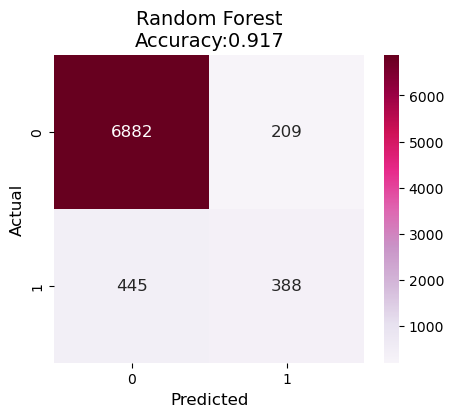

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7091
           1       0.65      0.47      0.54       833

    accuracy                           0.92      7924
   macro avg       0.79      0.72      0.75      7924
weighted avg       0.91      0.92      0.91      7924

Accuracy Score:- 0.9174659262998486
Precision Score:- 0.6499162479061976
Recall Score:- 0.4657863145258103


In [56]:
#  Create a confusion Matrix for Random Forest
cm = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,pred_rf)}')

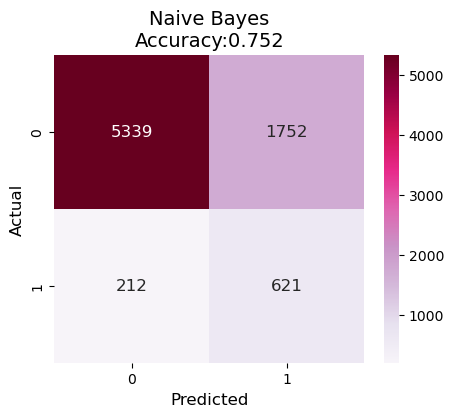

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      7091
           1       0.26      0.75      0.39       833

    accuracy                           0.75      7924
   macro avg       0.61      0.75      0.62      7924
weighted avg       0.89      0.75      0.80      7924

Accuracy Score:- 0.7521453811206461
Precision Score:- 0.26169405815423513
Recall Score:- 0.7454981992797118


In [57]:
# Create a confusion Matrix for Naive Bayes
cm = confusion_matrix(y_test, pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, pred_nb)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, pred_nb))

print(f'Accuracy Score:- {accuracy_score(y_test, pred_nb)}')
print(f'Precision Score:- {precision_score(y_test,pred_nb)}')
print(f'Recall Score:- {recall_score(y_test,pred_nb)}')

Berdasarkan hasil klasifikasi di atas, dapat diketahui bahwa semua algoritma belum memberikan performa prediksi klasifikasi yang cukup baik karena data yang digunakan adalah imbalanced dataset sehingga perlu penanganan yang lebih lanjut lagi. Namun, algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dibandingkan dengan lainnya dengan nilai akurasi yang dihasilkan sebesar 0.917, nilai presisi sebesar 0.649, nilai recall sebesar 0.465, dan f1-score sebesar 0.54.

# Features Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, selanjutnya akan dicek feature importance dari data guna mengetahui fitur/kolom mana yang paling berpengaruh dalam menentukan prediksi target.

In [58]:
data = df_new.copy()
data.drop('y', axis=1, inplace=True)
feature_names = list(data.columns.values)

In [59]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

duration                         3.031138e-01
euribor3m                        1.079901e-01
age                              8.755053e-02
nr.employed                      5.549252e-02
campaign                         4.198087e-02
cons.conf.idx                    3.617672e-02
cons.price.idx                   3.363369e-02
pdays                            3.078941e-02
emp.var.rate                     2.807186e-02
poutcome_success                 2.254749e-02
housing_yes                      1.359970e-02
housing_no                       1.343447e-02
job_admin.                       1.210757e-02
education_university.degree      1.182406e-02
previous                         1.155036e-02
marital_married                  1.145363e-02
education_high.school            1.113544e-02
marital_single                   1.060274e-02
job_technician                   1.026571e-02
loan_no                          9.451661e-03
loan_yes                         8.887585e-03
education_professional.course    8

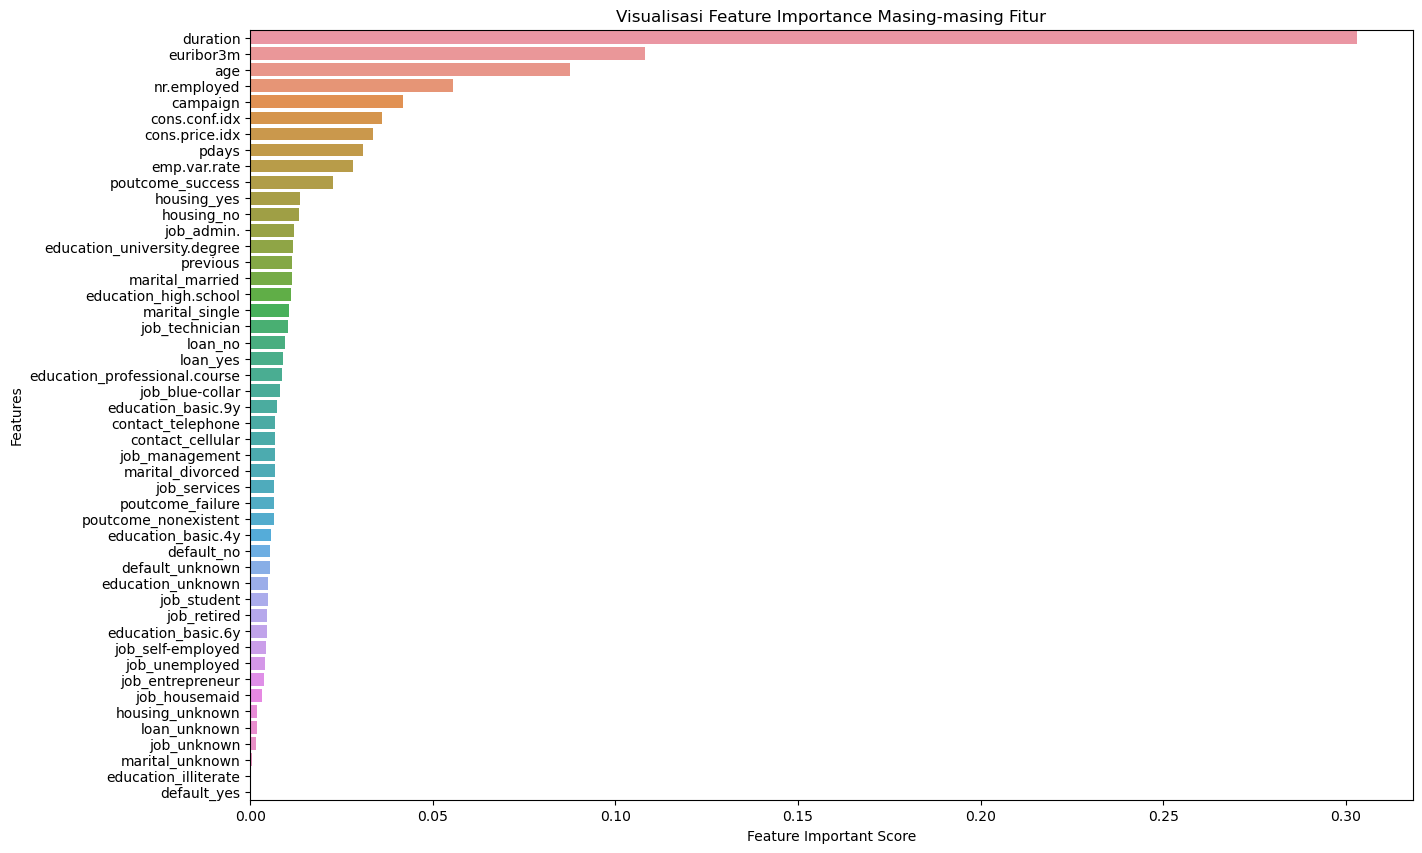

In [60]:
# Visualisasi features importance 
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance Masing-masing Fitur")
plt.show()

Dari plot di atas, dapat dilihat bahwa kolom previous adalah kolom numerik dengan nilai feature terendah. Namun, kolom ini tidak akan dihapus dari analisis karena korelasinya cenderung tinggi dengan variabel targetnya.

# Kesimpulan

Setelah dilakukan analisis di atas, dapat disimpulkan bahwa:

1. Sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank memilih untuk tidak berlangganan deposit berjangka sebanyak 36537 klien. Sedangkan 4639 klien lainnya memilih untuk berlangganan deposit berjangka.
2. Rata-rata umur klien yang ditunjuk sebagai target kampanye adalah 40 tahun dengan umur termuda, yaitu 17 tahun dan umur tertuanya adalah 98 tahun. Mayoritas klien yang ditunjuk sebagai target berusia sekitar 30-40 tahun.
3. Durasi telepon memiliki korelasi paling kuat terhadap variabel y sehingga semakin lama durasinya, maka semakin besar kemungkinan klien memilih untuk berlangganan deposito berjangka.
4. Korelasi yang memiliki nilai korelasi negatif dengan variabel y adalah karakteristik sosial dan ekonomi.
5. Mayoritas klien memiliki status sudah menikah dengan pekerjaan mayoritasnya adalah sebagai admin, tidak memiliki beban hutang, dan memiliki gelar pendidikan univesity degree.
6. Algoritma Random Forest adalah algoritma yang memiliki performa klasifikasi yang cenderung lebih baik dibandingkan dengan lainnya dengan nilai akurasi yang dihasilkan sebesar 0.917, nilai presisi sebesar 0.649, nilai recall sebesar 0.465, dan f1-score sebesar 0.54.
7. Dalam upaya meningkatkan performa prediksi klasifikasi diperlukan adanya penanganan pada data imbalanced dan dilakukan hypertuning parameter.